In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing dataset
ds=pd.read_csv("UberDataset.csv")

In [3]:
ds.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
ds.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [5]:
ds.columns=ds.columns.str.replace("*","")

In [6]:
ds.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [8]:
ds.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [9]:
ds.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [10]:
ds.dropna(how="all",subset=['END_DATE','CATEGORY','START','STOP','PURPOSE'],inplace=True)

In [11]:
(ds["PURPOSE"].isnull().sum()/ds.shape[0])*100 #to know how many percent is null data
  

43.46320346320346

In [12]:
#using forward filling
ds['PURPOSE'].fillna(method="ffill",inplace=True)

In [13]:
ds.head(5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [14]:
ds['START_DATE']=pd.to_datetime(ds['START_DATE'])
ds['END_DATE']=pd.to_datetime(ds['END_DATE'])

<AxesSubplot:>

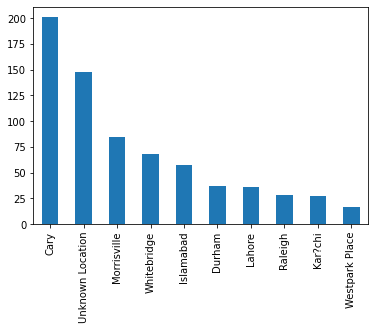

In [15]:
# TOP 10 starting points of the trips
ds['START'].value_counts().head(10).plot(kind="bar")

In [16]:
# 10 Least visit starting points
ds['START'].value_counts().tail(10)

Seattle                1
University District    1
Mcvan                  1
Burtrose               1
Meredith               1
Florence               1
Ridgeland              1
Daytona Beach          1
Sky Lake               1
Gampaha                1
Name: START, dtype: int64

In [17]:
#10 most visit stop points
ds['STOP'].value_counts().head(10)

Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Name: STOP, dtype: int64

In [18]:
ds['MILES'].value_counts().head(10)

9.9     28
3.1     26
2.1     19
10.4    19
3.0     19
2.5     19
1.7     18
1.8     18
2.2     18
2.8     16
Name: MILES, dtype: int64

In [19]:
ds['PURPOSE'].value_counts().head(10)

Meeting            308
Meal/Entertain     245
Temporary Site     196
Errand/Supplies    173
Customer Visit     155
Airport/Travel      54
Between Offices     18
Moving               4
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

In [20]:
ds.describe()

,MILES
count,1155.000000
mean,10.566840
std,21.579106
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


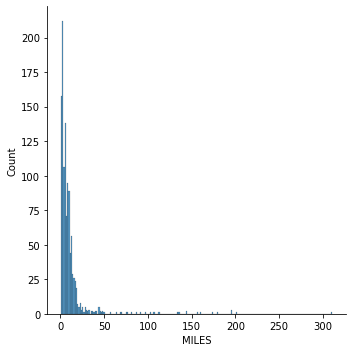

In [21]:
sns.displot(ds['MILES'])

<AxesSubplot:xlabel='PURPOSE', ylabel='count'>

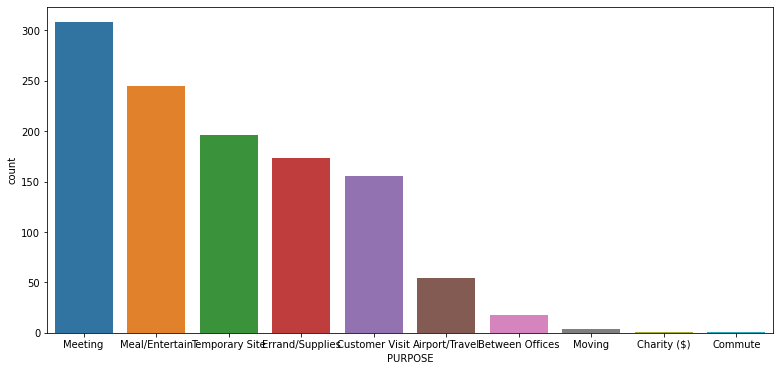

In [32]:
plt.figure(figsize=(13,6))
sns.countplot(ds['PURPOSE'],order=ds['PURPOSE'].value_counts().index)

In [52]:
#to know distance between start and stop .(that shows how cab driver go for long distance and some are going from short distance)
ds.groupby(['START','STOP'])['MILES'].unique()
ds.groupby(['START','STOP'])['MILES'].min()
ds.groupby(['START','STOP'])['MILES'].max().reset_index().sort_values('MILES',ascending=False).head(10)

,START,STOP,MILES
173,Latta,Jacksonville,310.3
143,Jacksonville,Kissimmee,201.0
11,Asheville,Mebane,195.9
320,Unknown Location,Unknown Location,195.6
204,Morrisville,Banner Elk,195.3
27,Boone,Cary,180.2
144,Jacksonville,Ridgeland,174.2
112,Florence,Cary,159.3
45,Cary,Latta,144.0
260,Ridgeland,Florence,144.0


In [55]:
#to know total minutes journey had.
ds['MINUTES']=ds['END_DATE']-ds['START_DATE']

In [56]:
ds

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00
...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,0 days 00:07:00
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,0 days 00:18:00
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,0 days 00:35:00
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,0 days 00:18:00


In [58]:
ds["MINUTES"]=ds['MINUTES'].dt.total_seconds()/60

In [59]:
ds

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0
...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0


In [82]:
#to know how many of them are round trips.
def round(x):
    if(x.START==x.STOP):
        return "yes"
    else:
        return "no"
    
ds['ROUND_TRIP']=ds.apply(round,axis=1)

#or

lst=[]
for i in range(1155):
    if(ds.START[i]==ds.STOP[i]):
        lst.append('yes')
    else:
        lst.append('no')
        
ds['ROUND_TRIP']=lst


In [83]:
ds

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES,ROUND_TRIP
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,yes
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,yes
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,yes
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,yes
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,no
...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,yes
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,no
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,yes
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,no


In [84]:
ds['ROUND_TRIP'].value_counts()

no     867
yes    288
Name: ROUND_TRIP, dtype: int64

In [89]:
ds.groupby(['START','STOP'])['ROUND_TRIP'].max().reset_index()

,START,STOP,ROUND_TRIP
0,Agnew,Agnew,yes
1,Agnew,Cory,no
2,Agnew,Renaissance,no
3,Almond,Bryson City,no
4,Apex,Apex,yes
...,...,...,...
358,Whitebridge,Wayne Ridge,no
359,Whitebridge,Westpark Place,no
360,Whitebridge,Whitebridge,yes
361,Whitebridge,Williamsburg Manor,no


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

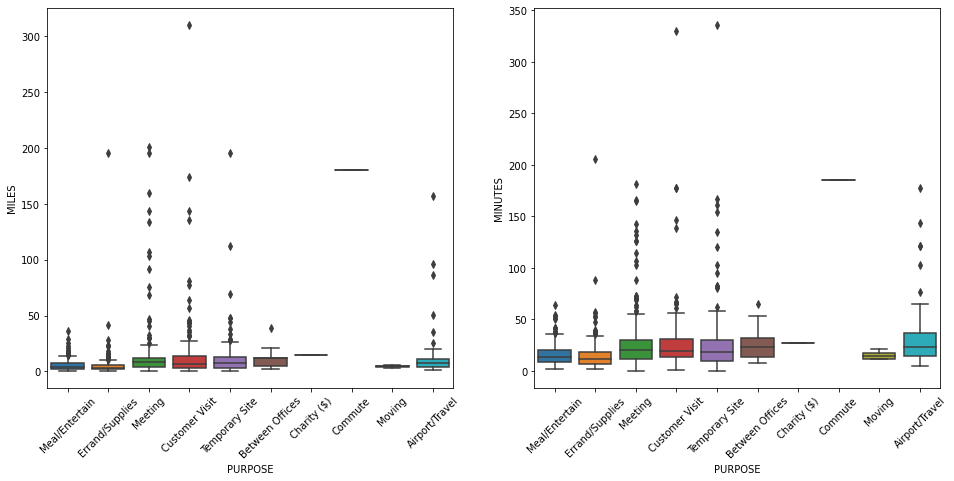

In [94]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=ds,x=ds['PURPOSE'],y=ds['MILES'])
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=ds,x=ds['PURPOSE'],y=ds['MINUTES'])
plt.xticks(rotation=45)

In [112]:
#to get months from date time
ds["MONTH"]=pd.DatetimeIndex(ds['START_DATE']).month

In [114]:
def Month(ds):
    if ds['MONTH'] == 1:
        return('January')
    elif ds['MONTH']== 2:
        return('February')
    elif ds['MONTH'] == 3:
        return('March')
    elif ds['MONTH'] == 4:
        return('April')
    elif ds['MONTH'] == 5:
        return('May')
    elif ds['MONTH'] == 6:
        return('June')
    elif ds['MONTH'] == 7:
        return('July')
    elif ds['MONTH'] == 8:
        return('August')
    elif ds['MONTH'] == 9:
        return('September')
    elif ds['MONTH'] == 10:
        return('October')
    elif ds['MONTH'] == 11:
        return('November')
    elif ds['MONTH'] == 12:
        return('December')
ds['MONTH'] = ds.apply(Month, axis=1)

In [115]:
ds

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES,ROUND_TRIP,MONTH,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,yes,January,None
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,yes,January,None
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,yes,January,None
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,yes,January,None
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,no,January,None
...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,yes,December,None
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,no,December,None
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,yes,December,None
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,no,December,None


In [118]:
ds.drop(['month'],axis=1)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES,ROUND_TRIP,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,yes,January
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,yes,January
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,yes,January
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,yes,January
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,no,January
...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,yes,December
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,no,December
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,yes,December
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,no,December


In [121]:
ds.groupby(['MONTH','ROUND_TRIP'])['ROUND_TRIP'].count()

MONTH      ROUND_TRIP
April      no             49
           yes             5
August     no             86
           yes            47
December   no             63
           yes            83
February   no             86
           yes            29
January    no             44
           yes            17
July       no            101
           yes            11
June       no             97
           yes            11
March      no             99
           yes            14
May        no             49
November   no             96
           yes            26
October    no             82
           yes            24
September  no             15
           yes            21
Name: ROUND_TRIP, dtype: int64

<AxesSubplot:xlabel='MONTH', ylabel='count'>

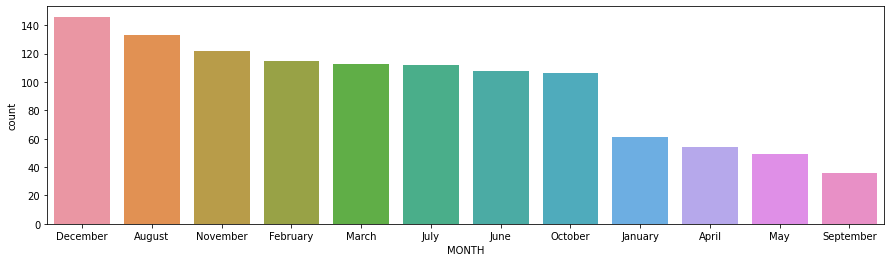

In [123]:
plt.figure(figsize=(15,4))
sns.countplot(ds['MONTH'],order=ds['MONTH'].value_counts().index)